# Predicting Enron Spam Emails using Supervised Learning

## DS-GA 1001: Introduction to Data Science Final Project

### Scripts

## Exploratory Data Analysis

Created On: 11/25/2020

Modified On: 11/30/2020

### Description

This script applies exploratory data analysis (EDA) to the `emails_cleaned.csv` dataset. 

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

### Analyze Text Statistics

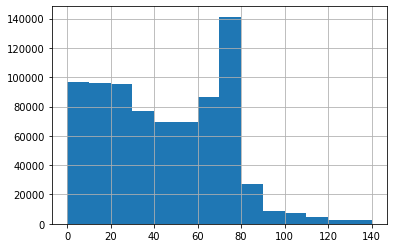

In [19]:
# Plot the average word length in each email instance
df2 = pd.read_csv('../data/emails.csv')
df2['X'].str.len().hist(bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140])

In [21]:
df = pd.read_csv('../data/emails_cleaned.csv')

In [22]:
df.shape

(829210, 2)

### Missing Values

In [23]:
print('\nTotal missing values (NaN) in each column: \n\n', df.isnull().sum())


Total missing values (NaN) in each column: 

 X    43538
y        0
dtype: int64


In [24]:
print('Total missing values (NaN) takes up ', str(41998/829210),' of our data')

Total missing values (NaN) takes up  0.05064820732986819  of our data


In [25]:
# Drop rows containing missing values
df = df.dropna(axis=0, how='any')

### Dimensions

The cleaned email dataset has 2 columns and 787,212 data records.

In [26]:
df.shape

(785672, 2)

In [27]:
df.head()

,X,y
1,larger file cabinets located hallway,0
2,x iris host,1
3,muschar,0
4,fax,0
5,good one us non mba,0


### Plot Frequencies

In [28]:
import itertools
import collections
token = [word.lower().split() for word in df['X']]

token_extract=list(itertools.chain(*token))
token_count=collections.Counter(token_extract)

In [29]:
clean_token = pd.DataFrame(token_count.most_common(15),
                             columns=['words', 'count'])
clean_token

,words,count
0,com,23970
1,company,22911
2,please,19974
3,would,15394
4,new,15140
5,may,13050
6,information,12985
7,time,12267
8,business,12108
9,said,11866


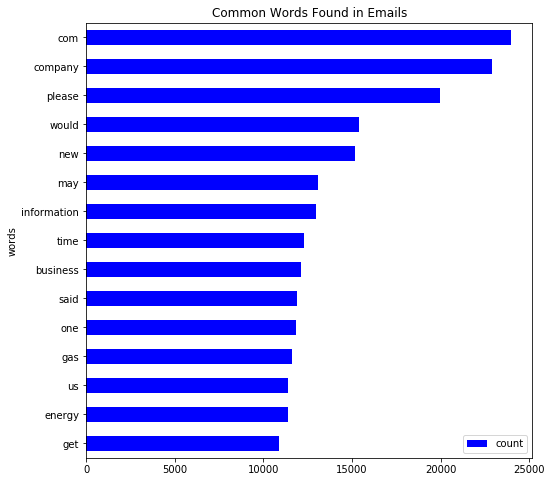

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_token.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Emails")

plt.show()

In [31]:
clean_token

,words,count
0,com,23970
1,company,22911
2,please,19974
3,would,15394
4,new,15140
5,may,13050
6,information,12985
7,time,12267
8,business,12108
9,said,11866


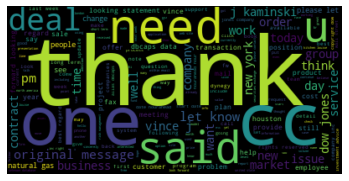

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#convert list to string
str_token = ' '.join(map(str, token_extract)) 

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str_token)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

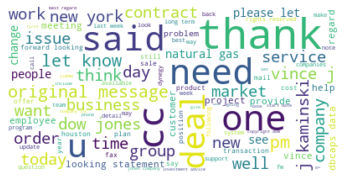

In [33]:
#change background color for the word cloud plot
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_token)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
wordcloud.to_file("wordcloud1.png")
wordcloud2.to_file("wordcloud2.png")

In [35]:
#check the path to python
import sys
print(sys.executable)

/Users/jiejie/opt/anaconda3/bin/python


In [36]:
#input the following code in jupyter notebook terminal to install wordcloud
#/Users/jiejie/opt/anaconda3/bin/python -m pip install wordcloud

### Head and Tail

Below are the first and last 5 rows of record.

In [37]:
display(df.head())
display(df.tail())

,X,y
1,larger file cabinets located hallway,0
2,x iris host,1
3,muschar,0
4,fax,0
5,good one us non mba,0


,X,y
829205,cairn gas purchase bid,0
829206,save order,1
829207,ready boost sex life positive,1
829208,thesecu rities exch ange act statem ents express,1
829209,equipment detect possibie problems become serious,1


### Spam Ratio

In our dataset, 379,336 records are marked as **spam** (48.19\%) . 407,876 are not spam (51.81\%).

In [38]:
display(df['y'].value_counts())
display((df['y'].value_counts() / len(df['y'])) * 100)

0    407140
1    378532
Name: y, dtype: int64

0    51.820607
1    48.179393
Name: y, dtype: float64

### Vectorization

Next, collect each word and its frequency in each email.

In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['X'])

In [40]:
display(X.shape)

(785672, 143171)

Within the 787,212 email records, there are 143,176 unique words (features) in the dataset.

In [47]:
# print the first 10 features
display(vectorizer.get_feature_names()[:10])

['aa',
 'aaa',
 'aaaa',
 'aaaacy',
 'aaaahhhhhh',
 'aaadrizzle',
 'aaaenerfax',
 'aaagrp',
 'aaal',
 'aaaplusdirect']

In [45]:
# mapping from feature integer indices to feature name.
dict(itertools.islice(vectorizer.vocabulary_.items(), 15))

{'larger': 70402,
 'file': 44939,
 'cabinets': 17289,
 'located': 73401,
 'hallway': 53755,
 'iris': 63330,
 'host': 57180,
 'muschar': 82527,
 'fax': 43836,
 'good': 51518,
 'one': 88811,
 'us': 130610,
 'non': 85731,
 'mba': 77196,
 'january': 64509}